In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv

# Tissue - oncogene correaltion (failed test)

In [2]:
compacted = np.loadtxt(open("truncated_compacted.csv", "rb"), delimiter=",", skiprows=1)
compacted = np.array(compacted, dtype="int")

In [3]:
def compute_avg_hamming_dist(mtx):
    avg_dist = 0
    for i in range(len(mtx) - 1):
        for j in range(i, len(mtx)):
            hamming_dist = 0
            a = (mtx[i] == 0)
            b = (mtx[j] == 0)
            for k in range(len(a)):
                #if mtx[i][k] != mtx[j][k]:
                if a[k] != b[k]:
                    hamming_dist += 1
            avg_dist += hamming_dist/len(a)
    return avg_dist

In [4]:
def random_tissue_idx(mtx):
    result = np.array(mtx)
    i = 0
    for row in result:
        np.random.shuffle(row)
    return result

In [5]:
compute_avg_hamming_dist(compacted)

70.00000000000017

In [6]:
new = random_tissue_idx(compacted)
compute_avg_hamming_dist(new)

101.77777777777797

### The test above only shows that some of the oncogenes are tissue-specified but does not give any clue on which oncogene is tissue-specified and which is not

# Permutation test

In [7]:
Lines = []
with open("compacted.csv", "r") as f:
    Lines = f.readlines()
tissues = Lines[0].split(",")
tissues = [t.split('"')[1] for t in tissues][:-2]
genes = [(l.split(",")[-2]).split('"')[1] for l in Lines[1:]]
n_g_t = np.array([list(map(int, l.split(",")[:-2])) for l in Lines[1:]])
n_g = [(l.split(",")[-1]).split("\n")[0] for l in Lines[1:]]
n_g = np.array(n_g, dtype="int")
n_max_g = np.amax(n_g_t, 1)

In [8]:
def permutation_test(n_g, n_max_g, n_g_t, N=1000):
    n_gene, n_tissue = n_g_t.shape
    frac_list = np.zeros(n_gene)
    for n in range(N):
        for g in range(n_gene):
            temp_row = np.zeros(n_tissue)
            for i in range(n_g[g]):
                t_idx = random.randint(0, n_tissue-1)
                temp_row[t_idx] += 1
            if np.max(temp_row) >= n_max_g[g]:
                frac_list[g] += 1
    return frac_list / N

In [9]:
frac_list = permutation_test(n_g, n_max_g, n_g_t)

In [10]:
frac_list

array([0.   , 0.002, 0.   , 0.   , 0.   , 0.089, 0.   , 0.041, 0.   ,
       0.052, 0.001, 0.022, 0.032, 0.452, 0.   , 0.   , 0.027, 0.   ,
       0.013, 0.29 , 0.271, 0.29 , 0.304, 0.28 , 0.293, 0.28 , 0.283,
       0.273, 0.   , 0.294, 0.   ])

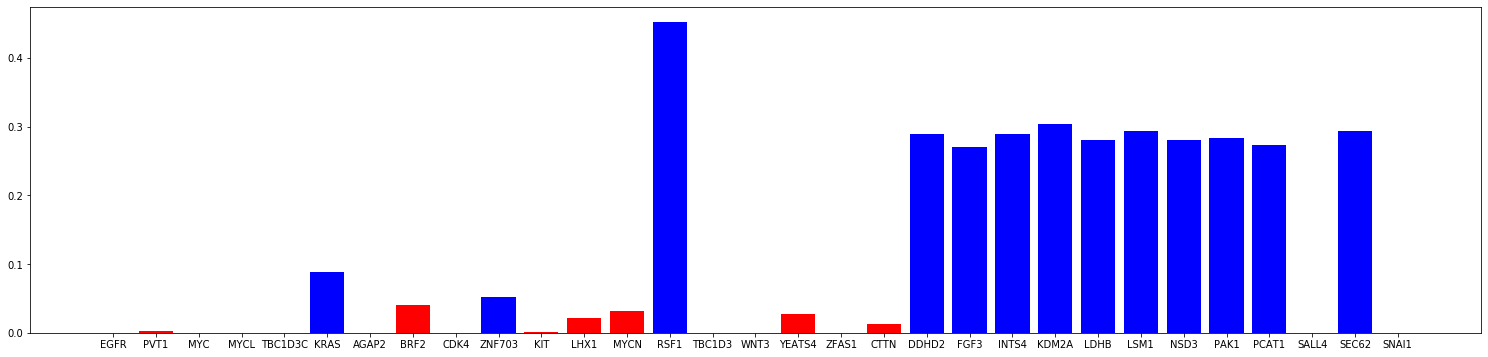

In [11]:
x_pos = range(len(genes))
colors = ['blue'] * len(genes)
for i in range(len(frac_list)):
    if frac_list[i] < 0.05:
        colors[i] = 'red'

fig = plt.figure(1, [26, 6])
plt.bar(x_pos, frac_list, color=colors)
plt.xticks(x_pos, genes)
plt.show()

In [12]:
for i in range(len(frac_list)):
    if frac_list[i] < 0.05:
        print(genes[i])

EGFR
PVT1
MYC
MYCL
TBC1D3C
AGAP2
BRF2
CDK4
KIT
LHX1
MYCN
TBC1D3
WNT3
YEATS4
ZFAS1
CTTN
SALL4
SNAI1


In [13]:
my_dict = {}
i = 0
for g in genes:
    my_dict[g] = frac_list[i]
    i += 1

In [16]:
with open('permutation_test_result.csv', 'w') as f:
    w = csv.DictWriter(f, my_dict.keys())
    w.writeheader()
    w.writerow(my_dict)